In [2]:
import umap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations 


In [2]:
X = np.random.rand(1000,100)

In [3]:
%%time
X_umap = umap.UMAP(random_state=0).fit_transform(X)

CPU times: user 7.74 s, sys: 1.12 s, total: 8.86 s
Wall time: 6.62 s


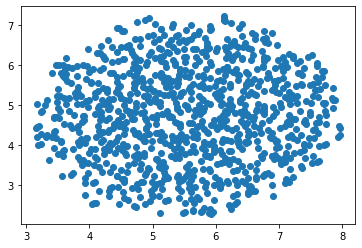

In [4]:
plt.scatter(X_umap[:,0],X_umap[:,1])

In [3]:
label_names = []
n_session_units = [3,3,4]
for session in range(3):
    for cl in range(n_session_units[session]):
        label_names.append(f"s{session}_cl{cl}")

In [6]:
label_names

['s0_cl0',
 's0_cl1',
 's0_cl2',
 's1_cl0',
 's1_cl1',
 's1_cl2',
 's2_cl0',
 's2_cl1',
 's2_cl2',
 's2_cl3']

In [123]:
np.random.seed(1)
X = np.random.rand(10,10)
X = 0.5*(X+X.T)
Xdf = pd.DataFrame(X, index=label_names, columns=label_names)
Xdf

,s0_cl0,s0_cl1,s0_cl2,s1_cl0,s1_cl1,s1_cl2,s2_cl0,s2_cl1,s2_cl2,s2_cl3
s0_cl0,0.417022,0.569760,0.400429,0.200340,0.567808,0.055853,0.144297,0.624481,0.640037,0.326781
s0_cl1,0.569760,0.685220,0.586357,0.649613,0.387777,0.674652,0.415680,0.348082,0.382030,0.573795
s0_cl2,0.400429,0.586357,0.313424,0.825106,0.578417,0.553117,0.389722,0.089166,0.460386,0.664027
s1_cl0,0.200340,0.649613,0.825106,0.533165,0.740578,0.290531,0.550340,0.821008,0.183593,0.664267
s1_cl1,0.567808,0.387777,0.578417,0.740578,0.103226,0.469733,0.479274,0.345645,0.278852,0.269083
s1_cl2,0.055853,0.674652,0.553117,0.290531,0.469733,0.053363,0.555007,0.156041,0.742596,0.468393
s2_cl0,0.144297,0.415680,0.389722,0.550340,0.479274,0.555007,0.663795,0.721199,0.686343,0.744967
s2_cl1,0.624481,0.348082,0.089166,0.821008,0.345645,0.156041,0.721199,0.347766,0.857826,0.649839
s2_cl2,0.640037,0.382030,0.460386,0.183593,0.278852,0.742596,0.686343,0.857826,0.663441,0.312283
s2_cl3,0.326781,0.573795,0.664027,0.664267,0.269083,0.468393,0.744967,0.649839,0.312283,0.617145


In [124]:
def find_all_cluster_matches(distance_mat, thr):
    
    labels = distance_mat.index.values
    assert np.all(labels == distance_mat.columns.values), "distance mat data frame must be squared and have matching index/columns" 
    
    n_cl = len(labels)
    matches = {}
    
    for jj in np.arange(n_cl):
        label1 = labels[jj]
        matches[label1] = []
        for ii in np.arange(n_cl):
            label2 = labels[ii]
            if labels[ii].split("_")[0] != labels[jj].split("_")[0]:
                if distance_mat.loc[label1,label2] < thr:
                    matches[label1].append(label2)
                    
    return matches

matches = find_all_cluster_matches(Xdf, 0.5)
matches

{'s0_cl0': ['s1_cl0', 's1_cl2', 's2_cl0', 's2_cl3'],
 's0_cl1': ['s1_cl1', 's2_cl0', 's2_cl1', 's2_cl2'],
 's0_cl2': ['s2_cl0', 's2_cl1', 's2_cl2'],
 's1_cl0': ['s0_cl0', 's2_cl2'],
 's1_cl1': ['s0_cl1', 's2_cl0', 's2_cl1', 's2_cl2', 's2_cl3'],
 's1_cl2': ['s0_cl0', 's2_cl1', 's2_cl3'],
 's2_cl0': ['s0_cl0', 's0_cl1', 's0_cl2', 's1_cl1'],
 's2_cl1': ['s0_cl1', 's0_cl2', 's1_cl1', 's1_cl2'],
 's2_cl2': ['s0_cl1', 's0_cl2', 's1_cl0', 's1_cl1'],
 's2_cl3': ['s0_cl0', 's1_cl1', 's1_cl2']}

In [199]:
def find_all_cluster_matches(distance_mat, thr):
    
    labels = distance_mat.index.values
    assert np.all(labels == distance_mat.columns.values), "distance mat data frame must be squared and have matching index/columns" 
    
    n_cl = len(labels)
    matches = {}
    
    for jj in np.arange(n_cl):
        label1 = labels[jj]
        matches[label1] = []
        for ii in np.arange(n_cl):
            label2 = labels[ii]
            if labels[ii].split("_")[0] != labels[jj].split("_")[0]:
                if distance_mat.loc[label1,label2] < thr:
                    matches[label1].append(label2)
                    
    return matches

def find_unique_session_cl_matches(distance_mat, thr, include_less_than_thr=True, exclude_multi_matched=True):
    """
    For a given labeled distance matrix data frame, obtain cluster matches in order of score. 
    
    params: 
        - distance_mat [pandas_df]: squared pandas data frame with labeled indices & columns as s#_cl#, 
            where the important part is that sessions and clusters within that session are separtated 
            by an underscore "_"
        - thr [float]: number indicating the thr for inclusion in matches
        - include_less_than_thr [bool]: if True (default) matches with <thr are included, 
            otherwise matches>thr are included
        - exclude_multi_matched [bool]: if True (default) cl matches that repeat won't be rematched 
            with another cluster.
        
    """

    labels = distance_mat.index.values
    assert np.all(labels == distance_mat.columns.values), "distance mat data frame must be squared and have matching index/columns" 
    
    n_cl = len(labels)
    
    # mask over threshold values & diagonal
    Y = np.array(Xdf.to_numpy())
    Y[Y>thr] = np.nan
    #Y[np.eye(n_cl)>0] = np.nan
    Y[np.tril_indices_from(Y)] = np.nan

    # sort distance matrix & exclude nan indices
    linear_sort_idx = np.argsort(Y.flatten())
    nan_sort_idx = np.isnan(Y.flatten()[linear_sort_idx])
    linear_sort_idx = linear_sort_idx[~nan_sort_idx]

    # get 2dims indices
    sort_match_idx = np.unravel_index(linear_sort_idx, (n_cl,n_cl))

    # get sessions
    sessions = []
    for l in labels:
        s = l.split('_')[0]
        if s not in sessions:
            sessions.append(s)
    
    # get possible cluster matches by session (excludes self)
    possible_cl_matches_session = {s:[] for s in sessions}
    for cl1 in labels:
        s1 = cl1.split('_')[0]
        for cl2 in labels:
            s2 = cl2.split('_')[0]
            # if sessions are different
            if s1 != s2:
                if cl2 not in possible_cl_matches_session[s1]:
                    possible_cl_matches_session[s1].append(cl2)
    
    # get possible sessions to be matched for each cluster, excludes own session
    possible_session_cl = {cl:[] for cl in labels}
    se_set = set(sessions)
    for cl in labels:
        possible_session_cl[cl] = list(se_set.difference({cl.split('_')[0]}))
    
    # pre-allocate
    matches = {cl:[] for cl in labels}
    cnt = 0
    
    # iterate over matches
    for ii,jj in zip(sort_match_idx[0],sort_match_idx[1]):
        # for each match, obtain cl label and session id
        cl1 = labels[ii]
        cl2 = labels[jj]

        s1 = cl1.split('_')[0]
        s2 = cl2.split('_')[0]

        # cl2 can be matched to a cluster in session1,
        if (cl2 in possible_cl_matches_session[s1]) & (cl1 in possible_cl_matches_session[s2]) :
            # s2 can be matched to cl1
            if (s2 in possible_session_cl[cl1]) & (s1 in possible_session_cl[cl2]):
                
                # abort matching if any of the two clusters has already been 
                cancel_match = False
                if exclude_multi_matched:
                    for clx in matches[cl1]:
                        if (s2 not in possible_session_cl[clx]):
                            cancel_match = True
                            break
                    for clx in matches[cl2]:
                        if (s2 not in possible_session_cl[clx]):
                            cancel_match = True
                            break
                    
                    # if exclude multiple matches, cl2 is removed from possible s1 matches.
                    possible_cl_matches_session[s1].remove(cl2)
                    possible_cl_matches_session[s2].remove(cl1)

                if not cancel_match:
                    # add that cluster to the unique matches
                    matches[cl1].append(cl2)
                    matches[cl2].append(cl1)
                
                # s2 clusters can no longer be matched to cl1
                possible_session_cl[cl1].remove(s2)
                possible_session_cl[cl2].remove(s1)

    return matches

def matches_dict_to_unique_sets(matches):
    
    # change matches to sets & including subsets
    all_matches_sets = []
    for cl, cl_matches in matches.items():
        all_matches_sets.append( set([cl]+cl_matches) )
        if len(cl_matches)>1:
            for clx in cl_matches:
                all_matches_sets.append( set([cl]+[clx]))
            
    # take out repeated sets
    cl_sets = []
    for cl_set in all_matches_sets:
        if cl_set not in cl_sets:
            cl_sets.append(cl_set)
    
    # subfunction to get all combinations
    def _get_subsets(big_set): 
        return [set(subset) for subset in combinations(big_set, len(big_set)-1)]
    
    def _recursive_valid_sets(all_sets, check_set):

        n_elements = len(check_set)

        # if only one element, set is valid
        if n_elements==1:
            return True
        # if set tuple in all sets, valid
        elif n_elements==2:
            return check_set in all_sets
        # if set is of 3 or more, all of the subsets must be in the list
        else:
            new_check_sets = _get_subsets(check_set)
            valid = True
            for set_i in new_check_sets:
                valid &= _recursive_valid_sets(all_sets, set_i)
            return valid

    valid_cl_sets = []
    for cl_set1 in cl_sets:
        if recursive_valid_sets(cl_sets, cl_set1):
            valid_cl_sets.append(cl_set1)
   
    return valid_cl_sets

unique_cl_matches = find_unique_session_cl_matches(Xdf, 0.5)
unique_cl_matches

{'s0_cl0': ['s1_cl2', 's2_cl0'],
 's0_cl1': [],
 's0_cl2': ['s2_cl1'],
 's1_cl0': ['s2_cl2'],
 's1_cl1': ['s2_cl3'],
 's1_cl2': ['s0_cl0'],
 's2_cl0': ['s0_cl0'],
 's2_cl1': ['s0_cl2'],
 's2_cl2': ['s1_cl0'],
 's2_cl3': ['s1_cl1']}

In [196]:
unique_cl_matches = find_unique_session_cl_matches(Xdf, 0.5)
unique_cl_matches

{'s0_cl0': ['s1_cl2', 's2_cl0'],
 's0_cl1': [],
 's0_cl2': ['s2_cl1'],
 's1_cl0': ['s2_cl2'],
 's1_cl1': ['s2_cl3'],
 's1_cl2': ['s0_cl0'],
 's2_cl0': ['s0_cl0'],
 's2_cl1': ['s0_cl2'],
 's2_cl2': ['s1_cl0'],
 's2_cl3': ['s1_cl1']}

In [198]:
cl_sets = matches_dict_to_unique_sets(unique_cl_matches)
cl_sets

[{'s0_cl0', 's1_cl2'},
 {'s0_cl0', 's2_cl0'},
 {'s0_cl1'},
 {'s0_cl2', 's2_cl1'},
 {'s1_cl0', 's2_cl2'},
 {'s1_cl1', 's2_cl3'}]

In [177]:
  
def rSubset(arr, r): 
    return list(combinations(arr, r)) 

def recursive_valid_sets(all_sets, check_set):
    
    n_elements = len(check_set)
        
    if n_elements==1:
        return True
    elif n_elements==2:
        return check_set in all_sets
    else:
        new_check_sets = rSubset(check_set, n_elements-1)
        valid = True
        for set_i in new_check_sets:
            valid &= recursive_valid_sets(all_sets, set_i)
        return valid

valid_cl_sets = []
for cl_set1 in cl_sets:
    if recursive_valid_sets(cl_sets, cl_set1):
        valid_cl_sets.append(cl_set1)
        
valid_cl_sets

[{'s0_cl1'},
 {'s0_cl2', 's2_cl1'},
 {'s1_cl0', 's2_cl2'},
 {'s1_cl1', 's2_cl3'},
 {'s0_cl0', 's1_cl2'},
 {'s0_cl0', 's2_cl0'}]

In [182]:
type(rSubset(cl_sets[0],2)[0])

tuple

In [145]:
possible_session_cl = {cl:[] for cl in labels}
se_set = set(sessions)
for cl in labels:
    
    possible_session_cl[cl] = list(se_set.difference({cl.split('_')[0]}))
    #possible_session_cl[cl] = set(sessions).difference(cl.split('_')[0])

In [146]:
possible_session_cl

{'s0_cl0': ['s2', 's1'],
 's0_cl1': ['s2', 's1'],
 's0_cl2': ['s2', 's1'],
 's1_cl0': ['s0', 's2'],
 's1_cl1': ['s0', 's2'],
 's1_cl2': ['s0', 's2'],
 's2_cl0': ['s0', 's1'],
 's2_cl1': ['s0', 's1'],
 's2_cl2': ['s0', 's1'],
 's2_cl3': ['s0', 's1']}

In [162]:
def get_cl_matches_tuples(distance_mat, thr):
    labels = distance_mat.index.values
    assert np.all(labels == distance_mat.columns.values), "distance mat data frame must be squared and have matching index/columns" 
    
    n_cl = len(labels)
    
    # mask over threshold values & diagonal
    Y = np.array(Xdf.to_numpy())
    Y[Y>thr] = np.nan
    Y[np.eye(n_cl)>0] = np.nan

    # sort distance matrix & exclude nan indices
    linear_sort_idx = np.argsort(Y.flatten())
    nan_sort_idx = np.isnan(Y.flatten()[linear_sort_idx])
    linear_sort_idx = linear_sort_idx[~nan_sort_idx]

    # get 2dims indices
    sort_match_idx = np.unravel_index(linear_sort_idx, (n_cl,n_cl))

    # pre-allocate
    matches = {}
    cl_matched_list = []
    cl_matched_sessions = {k:[] for k in labels}

    multi_matched = []
    cnt = 0
    for ii,jj in zip(sort_match_idx[0][::2],sort_match_idx[1][::2]):
        # for each match, obtain cl label and session id
        cl1 = labels[ii]
        cl2 = labels[jj]

        s1 = cl1.split('_')[0]
        s2 = cl2.split('_')[0]

        # if sessions are different
        if s1 != s2:
            if (s2 not in cl_matched_sessions[cl1]):
                matches[cnt] = (cl1,cl2)
                cnt+=1
    return matches

matches = get_cl_matches_tuples(Xdf, 0.5)
matches     
    

{0: ('s0_cl0', 's1_cl2'),
 1: ('s2_cl1', 's0_cl2'),
 2: ('s0_cl0', 's2_cl0'),
 3: ('s2_cl1', 's1_cl2'),
 4: ('s1_cl0', 's2_cl2'),
 5: ('s0_cl0', 's1_cl0'),
 6: ('s1_cl1', 's2_cl3'),
 7: ('s1_cl1', 's2_cl2'),
 8: ('s0_cl0', 's2_cl3'),
 9: ('s2_cl1', 's1_cl1'),
 10: ('s0_cl1', 's2_cl1'),
 11: ('s0_cl1', 's2_cl2'),
 12: ('s0_cl1', 's1_cl1'),
 13: ('s0_cl2', 's2_cl0'),
 14: ('s0_cl1', 's2_cl0'),
 15: ('s2_cl2', 's0_cl2'),
 16: ('s1_cl2', 's2_cl3'),
 17: ('s1_cl1', 's2_cl0')}

In [76]:
unique_matches = find_unique_cl_matches(Xdf, 0.5, exclude_multi_matched=True)
unique_matches

here
s0_cl2 s2_cl3
['s2_cl3', 's1_cl2']


{'s0_cl0': ['s2_cl0'],
 's0_cl1': ['s2_cl0', 's1_cl1'],
 's0_cl2': ['s2_cl3'],
 's1_cl0': ['s2_cl0'],
 's1_cl1': ['s2_cl0', 's0_cl1'],
 's1_cl2': ['s2_cl1', 's0_cl1'],
 's2_cl0': ['s0_cl1', 's1_cl1'],
 's2_cl1': ['s1_cl2'],
 's2_cl2': ['s0_cl2'],
 's2_cl3': ['s1_cl2', 's0_cl2']}

In [45]:
Xdf

,s0_cl0,s0_cl1,s0_cl2,s1_cl0,s1_cl1,s1_cl2,s2_cl0,s2_cl1,s2_cl2,s2_cl3
s0_cl0,NaN,0.454986,NaN,0.358365,0.307700,NaN,0.373502,0.395741,0.471429,NaN
s0_cl1,0.454986,NaN,0.241307,NaN,NaN,NaN,0.406453,NaN,0.126979,NaN
s0_cl2,NaN,0.241307,NaN,0.155103,0.494892,NaN,0.421606,0.110609,NaN,NaN
s1_cl0,0.358365,NaN,0.155103,NaN,NaN,NaN,NaN,NaN,NaN,0.291287
s1_cl1,0.307700,NaN,0.494892,NaN,NaN,0.457911,0.495146,NaN,NaN,NaN
s1_cl2,NaN,NaN,NaN,NaN,0.457911,NaN,NaN,0.108613,0.303251,NaN
s2_cl0,0.373502,0.406453,0.421606,NaN,0.495146,NaN,NaN,0.292260,NaN,NaN
s2_cl1,0.395741,NaN,0.110609,NaN,NaN,0.108613,0.292260,NaN,NaN,NaN
s2_cl2,0.471429,0.126979,NaN,NaN,NaN,0.303251,NaN,NaN,NaN,NaN
s2_cl3,NaN,NaN,NaN,0.291287,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:

labels = Xdf.index.values
n_sessions = 0
sessions = []
session_cl = {}
for idx, label in enumerate(labels):
    session, cl = label.split('_')
    if session not in sessions:
        sessions.append(session)
        session_cl[session] = [label]
    else:
        session_cl[session].append(label)


In [83]:
session_cl['s0']
    

['s0_cl0', 's0_cl1', 's0_cl2']

## retuning of the algorithm based on possibility of repeated sets

In [67]:
def find_unique_session_cl_matches(distance_mat, thr, exclude_more_than_thr=True,
                                   exclude_multi_matched=True, session_cl_sep='_'):
    """
    For a given labeled distance matrix data frame, obtain cluster matches in order of distance score.

    params:
        - distance_mat [pandas_df]: squared pandas data frame with labeled indices & columns as s#_cl#,
            where the important part is that sessions and clusters within that session are separtated
            by an underscore "_"
        - thr [float]: number indicating the thr for inclusion in matches
        - include_less_than_thr [bool]: if True (default) matches with <thr are included,
            otherwise matches>thr are included
        - exclude_multi_matched [bool]: if True (default) cl matches that repeat won't be rematched
            with another cluster.
        -  session_cl_sep [str]: on the labels, what char separates session and cluster

    returns:
        dict of matches indexed by label
    """

    labels = distance_mat.index.values
    assert np.all(
        labels == distance_mat.columns.values), \
        "distance mat data frame must be squared and have matching index/columns"

    n_cl = len(labels)

    # mask over threshold values & diagonal down [assumes symmetry]
    Y = np.array(distance_mat.to_numpy())
    if exclude_more_than_thr:
        Y[Y > thr] = np.nan
    else:
        Y[Y <= thr] = np.nan
    Y[np.tril_indices_from(Y)] = np.nan

    # sort distance matrix & exclude nan indices
    linear_sort_idx = np.argsort(Y.flatten())
    nan_sort_idx = np.isnan(Y.flatten()[linear_sort_idx])
    linear_sort_idx = linear_sort_idx[~nan_sort_idx]

    # get 2dims indices
    sort_match_idx = np.unravel_index(linear_sort_idx, (n_cl, n_cl))

    # get sessions
    sessions = []
    for ll in labels:
        s = ll.split(session_cl_sep)[0]
        if s not in sessions:
            sessions.append(s)

    # get possible cluster matches by session (excludes self)
    possible_cl_matches_session = {s: [] for s in sessions}
    for cl1 in labels:
        s1 = cl1.split(session_cl_sep)[0]
        for cl2 in labels:
            s2 = cl2.split(session_cl_sep)[0]
            # if sessions are different
            if s1 != s2:
                if cl2 not in possible_cl_matches_session[s1]:
                    possible_cl_matches_session[s1].append(cl2)

    # get possible sessions to be matched for each cluster, excludes own session
    possible_session_cl = {cl: [] for cl in labels}
    se_set = set(sessions)
    for cl in labels:
        possible_session_cl[cl] = list(se_set.difference({cl.split(session_cl_sep)[0]}))

    # pre-allocate
    matches = {cl: [] for cl in labels}
    cnt = 0

    # iterate over matches
    for ii, jj in zip(sort_match_idx[0], sort_match_idx[1]):
        # for each match, obtain cl label and session id
        cl1 = labels[ii]
        cl2 = labels[jj]

        s1 = cl1.split(session_cl_sep)[0]
        s2 = cl2.split(session_cl_sep)[0]

        # cl2 can be matched to a cluster in session1,
        if (cl2 in possible_cl_matches_session[s1]) & (cl1 in possible_cl_matches_session[s2]):
            # s2 can be matched to cl1
            if (s2 in possible_session_cl[cl1]) & (s1 in possible_session_cl[cl2]):

                # abort matching if any of the two clusters has already been
                cancel_match = False
                if exclude_multi_matched:
                    for clx in matches[cl1]:
                        if s2 not in possible_session_cl[clx]:
                            cancel_match = True
                            break
                    for clx in matches[cl2]:
                        if s2 not in possible_session_cl[clx]:
                            cancel_match = True
                            break

                    # if exclude multiple matches, cl2 is removed from possible s1 matches.
                    possible_cl_matches_session[s1].remove(cl2)
                    possible_cl_matches_session[s2].remove(cl1)

                if not cancel_match:
                    # add that cluster to the unique matches
                    matches[cl1].append(cl2)
                    matches[cl2].append(cl1)

                # s2 clusters can no longer be matched to cl1
                possible_session_cl[cl1].remove(s2)
                possible_session_cl[cl2].remove(s1)

    return matches

def matches_dict_to_unique_sets(matches, distance_mat, select_lower=True, require_subsets=True):
    """
    Run after find_unique_session_cl_matches. This returns the unique sets given a unique matches dictionary.
    :param matches: output of find_unique_session_cl_matches
    :distance_mat: distance matrix to be used for tie-breakers
    :select_lower: bool, if true selects lowest score for tie-breaker. score is determine by the product of all submatches 
        *note dm should be normalized such that max distance is 1 for select_lower=True
    :require_subsets: bool, if true, a bigger set can only be included if the subsets are present **convservative
    :return:
        list of unique cluster sets

    -- bug found. repeated elements across sets is possible.
    """
    
    # subfunction to get all combinations
    def _get_subsets(big_set):
        return [set(subset) for subset in combinations(big_set, len(big_set) - 1)]

    def _recursive_valid_sets(all_sets, check_set):

        n_elements = len(check_set)

        # if only one element, set is valid
        if n_elements == 1:
            return True
        # if set tuple in all sets, valid
        elif n_elements == 2:
            return check_set in all_sets
        # if set is of 3 or more, all of the subsets must be in the list
        else:
            new_check_sets = _get_subsets(check_set)
            valid = True
            for set_i in new_check_sets:
                valid &= _recursive_valid_sets(all_sets, set_i)
            return valid

    def _set2dict(cl_sets):
        cl_sets_dict = {}
        for cl_set in cl_sets:
            for cl in cl_set:
                if cl not in cl_sets_dict.keys():
                    cl_sets_dict[cl] = [cl_set - {cl}]
                else:
                    cl_sets_dict[cl].append(cl_set - {cl})
        return cl_sets_dict

    ## main ##

    # change matches to sets & including subsets
    all_matches_sets = []
    for cl, cl_matches in matches.items():
        all_matches_sets.append(set([cl] + cl_matches))
        if len(cl_matches) > 1:
            for clx in cl_matches:
                all_matches_sets.append(set([cl] + [clx]))

    # take out repeated sets
    cl_sets = []
    for cl_set in all_matches_sets:
        if cl_set not in cl_sets:
            cl_sets.append(cl_set)
  
    # verifies that larger sets contain the respective subsets
    # this is a conservative approach
    if require_subsets:
        valid_cl_sets = []
        for cl_set1 in cl_sets:
            if _recursive_valid_sets(cl_sets, cl_set1):
                valid_cl_sets.append(cl_set1)
        cl_sets = valid_cl_sets
        
    # change sets to a dict to verify there are no duplicate clusters
    cl_sets_dict = _set2dict(cl_sets)
    
    # iterate to get final set list
    valid_cl_sets = []
    for cl, clm in cl_sets_dict.items():
        n_matches = len(clm)
        if n_matches==1:  # unique match
            cl_set = {cl} | clm[0]
        else:  # match with best scoring set
            match_vals = np.zeros(n_matches)
            for ii, clm_i in enumerate(clm):  # takes product of the set matches
                match_vals[ii] = dm.loc[cl, [clx for clx in clm_i]].values.prod()

            if select_lower:
                ii = np.argmin(match_vals)
            else:
                ii = np.argmax(match_vals)

            # best scoring set
            cl_set = {cl} | clm[ii]

        # make sure it is not already on the list
        if cl_set not in valid_cl_sets:
            valid_cl_sets.append(cl_set)
            
    valid_cl_sets_dict = _set2dict(valid_cl_sets)

    return valid_cl_sets, valid_cl_sets_dict

In [64]:
valid_cl_sets = [{'a','b'}, {'c','d'}, {'b','d'}]
dm = pd.DataFrame(np.array( [[0,0.5,2,2],[0.5, 0, 2, 0.6], [2,2,0,0.5], [0,0.6,0.5,0] ] ), columns=['a','b','c','d'], index=['a','b','c','d'])
#dm = pd.DataFrame(np.random.rand(4,4), columns=['a','b','c','d'], index=['a','b','c','d'])
#dm = dm+dm.T
cl_sets_dict = {}
for cl_set in valid_cl_sets:
    for cl in cl_set:
        if cl not in cl_sets_dict.keys():
            cl_sets_dict[cl] = [cl_set - {cl}]
        else:
            cl_sets_dict[cl].append(cl_set - {cl})


cl_sets_dict

{'a': [{'b'}], 'b': [{'a'}, {'d'}], 'c': [{'d'}], 'd': [{'c'}, {'b'}]}

In [103]:
lower_better = False
valid_cl_sets = []
dm2 = 2-dm/dm.max()
for cl, clm in cl_sets_dict.items():
    n_matches = len(clm)
    if n_matches==1:  # unique match
        cl_set = {cl} | clm[0]
    else:  # match with best scoring set
        match_vals = np.zeros(n_matches)
        for ii, clm_i in enumerate(clm):
            match_vals[ii] = dm2.loc[cl, [clx for clx in clm_i]].values.prod()
        
        if lower_better:
            ii = np.argmin(match_vals)
        else:
            ii = np.argmax(match_vals)
        
        cl_set = {cl} | clm[ii]
    
    if cl_set not in valid_cl_sets:
        valid_cl_sets.append(cl_set)
        

valid_cl_sets

[{'a', 'b'}, {'c', 'd'}]

In [82]:
np.array([0.75, 0.8, 0.9])/0.6


array([1.25      , 1.33333333, 1.5       ])

In [97]:
dm.values.max()+1-(dm)

,a,b,c,d
a,3.0,2.5,1.0,1.0
b,2.5,3.0,1.0,2.4
c,1.0,1.0,3.0,2.5
d,3.0,2.4,2.5,3.0


In [101]:
dm2 = 2-dm/dm.max()

,a,b,c,d
a,2.00,1.75,1.00,1.00
b,1.75,2.00,1.00,1.70
c,1.00,1.00,2.00,1.75
d,2.00,1.70,1.75,2.00
